In [3]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

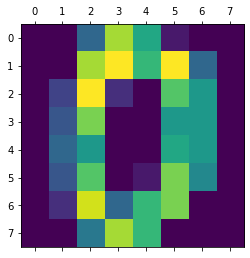

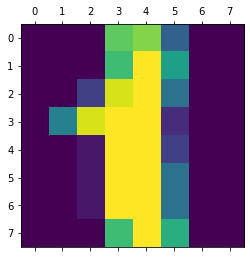

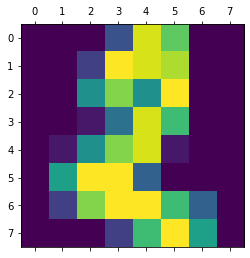

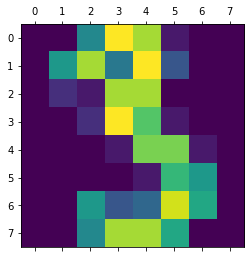

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(4):
    plt.matshow(digits.images[i])


In [9]:
type(digits.images[i])

numpy.ndarray

In [10]:
digits.images[i].shape

(8, 8)

In [11]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [15]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(digits.data,digits.target,train_size = 0.8)

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 35)
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=35,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
model.score(X_test,Y_test)

0.9666666666666667

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
cm

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 27,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 53,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 40,  1,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 28,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 27]], dtype=int64)

In [34]:
from sklearn.datasets import load_iris
iris = load_iris()

In [35]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [55]:
X_train, X_test , Y_train, Y_test = train_test_split(iris.data,iris.target,test_size = 0.8)

In [56]:
model = RandomForestClassifier(n_estimators = 25)
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
model.score(X_test,Y_test)

0.95

In [58]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred,Y_test)
cm

array([[40,  0,  0],
       [ 0, 37,  3],
       [ 0,  3, 37]], dtype=int64)

In [59]:
model.feature_importances_

array([0.22099402, 0.0361801 , 0.33466282, 0.40816306])

In [60]:
import seaborn as sn

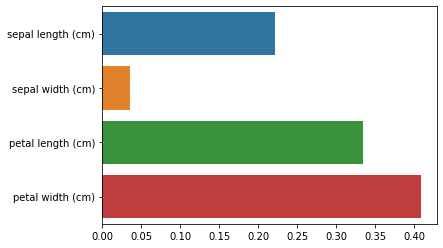

In [61]:
sn.barplot(x = model.feature_importances_ , y = iris.feature_names)

Text(33.0, 0.5, 'Truth')

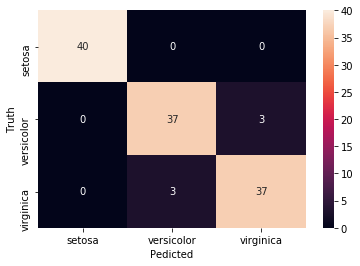

In [68]:
sn.heatmap(cm, annot = True, xticklabels=iris.target_names , yticklabels=iris.target_names)
plt.xlabel('Pedicted')
plt.ylabel('Truth')